In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.data import Dataset
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [117]:
#데이터로드
train_img=cv2.imread('C:\\Users\\admin\\Downloads\\ex\\data\\img (1).png') #훈련 데이터
train_img=np.array(train_img)
train_img=np.expand_dims(train_img, axis=0)

for k in range(2,376):
    sk=cv2.imread('C:\\Users\\admin\\Downloads\\ex\\data\\img ({}).png'.format(k))
    sk=np.array(sk)
    sk=np.expand_dims(sk, axis=0)
    train_img=np.concatenate((train_img,sk))


test_img=cv2.imread('C:\\Users\\admin\\Downloads\\ex\\data\\img (376).png') #테스트 데이터
test_img=np.array(test_img)
test_img=np.expand_dims(test_img, axis=0)

for k in range(377,501):
    t_sk=cv2.imread('C:\\Users\\admin\\Downloads\\ex\\data\\img ({}).png'.format(k))
    t_sk=np.array(t_sk)
    t_sk=np.expand_dims(t_sk, axis=0)
    test_img=np.concatenate((test_img,t_sk))

In [118]:
with open('train_label.csv') as r:
    train_labels=list(map(int,r.read().split('\n')))
    train_labels=np.asarray(train_labels)
with open('test_label.csv') as r:
    test_labels=list(map(int,r.read().split('\n')))
    test_labels=np.asarray(test_labels)

In [119]:
class_names = ['dk','sk']

In [120]:
print(train_img.shape, test_img.shape, train_labels.shape, test_labels.shape)

(375, 256, 256, 3) (125, 256, 256, 3) (375,) (125,)


In [121]:
# 훈련데이터, 테스트데이터 전처리
train_img = train_img / 255.0
test_img = test_img / 255.0

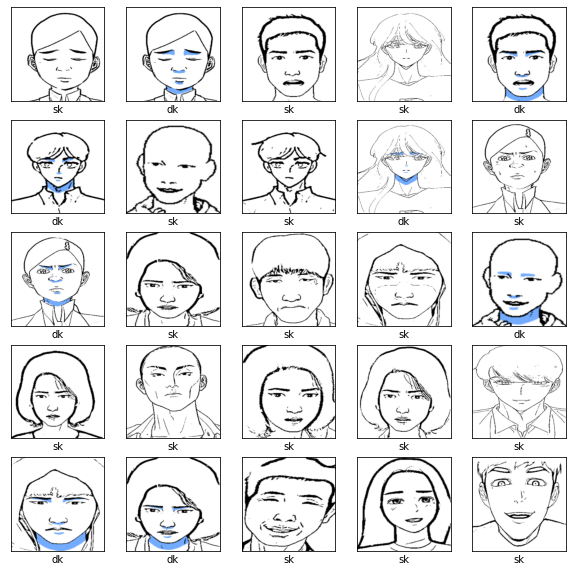

In [122]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [154]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [155]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
model.fit(train_img, train_labels, epochs=50)

Epoch 1/50
12/12 [==============================] - 4s 270ms/step - loss: 220.4458 - accuracy: 0.3664
Epoch 2/50
12/12 [==============================] - 3s 275ms/step - loss: 99.8146 - accuracy: 0.4699
Epoch 3/50
12/12 [==============================] - 3s 278ms/step - loss: 136.5833 - accuracy: 0.4495
Epoch 4/50
12/12 [==============================] - 3s 278ms/step - loss: 188.2805 - accuracy: 0.5276
Epoch 5/50
12/12 [==============================] - 3s 276ms/step - loss: 223.2624 - accuracy: 0.4808
Epoch 6/50
12/12 [==============================] - 3s 277ms/step - loss: 247.0853 - accuracy: 0.5039
Epoch 7/50
12/12 [==============================] - 3s 279ms/step - loss: 148.0433 - accuracy: 0.5547
Epoch 8/50
12/12 [==============================] - 3s 276ms/step - loss: 17.6354 - accuracy: 0.6992
Epoch 9/50
12/12 [==============================] - 3s 277ms/step - loss: 29.0250 - accuracy: 0.5380
Epoch 10/50
12/12 [==============================] - 3s 277ms/step - loss: 5.4319 - a

In [157]:
test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

4/4 - 0s - loss: 12.5387 - accuracy: 0.7680

테스트 정확도: 0.7680000066757202


In [158]:
predictions = model.predict(test_img)

In [159]:
predictions[0]
np.argmax(predictions[0])
test_labels[0]

1

In [160]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

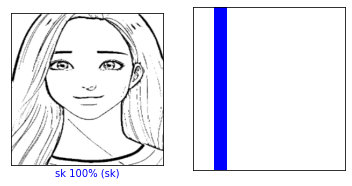

In [161]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

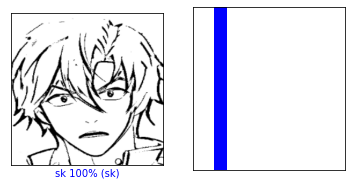

In [162]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

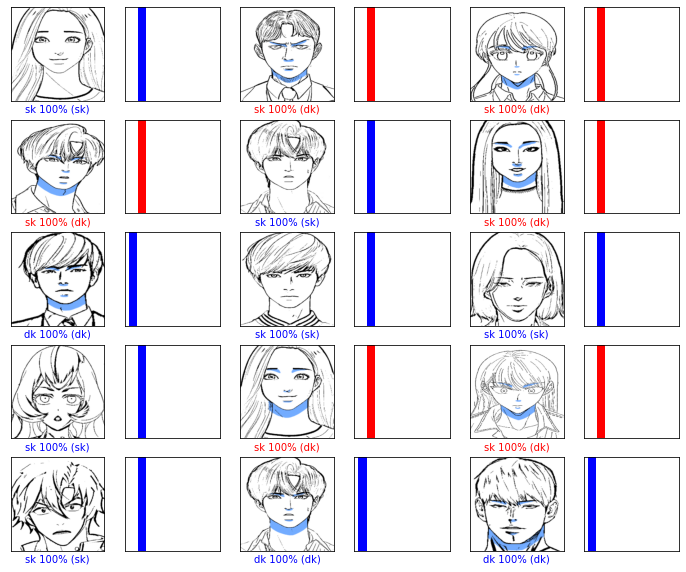

In [163]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_img)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [164]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_img[0]

print(img.shape)

(256, 256, 3)


In [165]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 256, 256, 3)


In [166]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


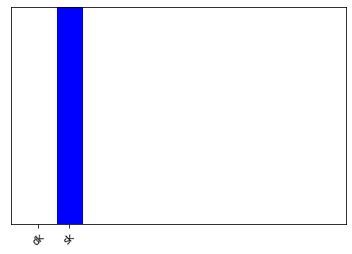

In [167]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(2), class_names, rotation=45)

In [145]:
np.argmax(predictions_single[0])

1